<a href="https://www.kaggle.com/code/yannicksteph/cnn-gtsrb-classification-with-cnn?scriptVersionId=137264395" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [CNN]-[GTSRB] - Classification of GTSRB Dataset Using Convolutional Neural Networks (CNN)

This notebook delves into a classification task involving the use of Convolutional Neural Networks (CNNs) on the GTSRB dataset.

The German Traffic Sign Recognition Benchmark (GTSRB) is a dataset comprising over 50,000 photos of road signs categorized into approximately 40 classes.

A detailed description of the dataset can be found at: [http://benchmark.ini.rub.de/](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset)

We have structured the notebook into two main sections:

# Objectives
This section delineates the specific goals of this notebook, which are:

- Training a Convolutional Neural Networks (CNNs) model to achieve high accuracy in classification of road signs.

# Implementation
This section presents the hands-on steps necessary to attain the previously mentioned objectives. These steps include:

- **Imports, Constants, and Methods:** Setting up the necessary libraries, constants, and methods for our task.
- **Data Retrieval:** Acquiring the GTSRB dataset to be used for training and testing purposes.
- **Data Preparation:** Preprocessing and setting up the dataset to facilitate effective training of the CNN model.
- **Model Creation:** Architecting and constructing the CNN model utilizing Keras.
- **Model Training:** Engaging the CNN model in learning using the prepared dataset.
- **Evaluation:** Gauging the trained model's performance and analyzing the classification results.


## 1. Imports & Constants & Methods
### 1. Import

In [1]:
!pip install visualkeras

import os  # For operating system related functionalities
import time  # For time-related functionalities
import sys  # For system-specific parameters and functions
import csv  # For reading and writing CSV files
import math  # For mathematical operations
import glob
import random  # For generating random numbers
import numpy as np  # For numerical operations on arrays
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating plots and visualizations
import h5py  # For working with HDF5 files
import ipywidgets as widgets  # For creating interactive widgets in Jupyter Notebook
from ipywidgets import IntProgress
from IPython.display import display, Markdown  # For displaying outputs and Markdown text

import visualkeras # Model visual

import skimage  # For image processing operations
from skimage import io, color, transform  # For reading and manipulating images


from tensorflow.keras.models import load_model
import tensorflow as tf  # For building and training machine learning models
from tensorflow import keras  # High-level API for TensorFlow
import json  # For working with JSON data
from IPython.display import display  # For displaying outputs in Jupyter Notebook
import sklearn
import itertools

import warnings  # For ignoring warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 13.4 MB/s eta 0:00:0000:0100:01


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

### 1.2. Constants
Generating datasets can be a time and space-consuming process, taking approximately **10 minutes** and requiring **10 GB** of storage space.

To customize the dataset generation, you have the option to perform tests or generate the entire enhanced dataset by adjusting the following parameters:

- `datasets`: This is a list of datasets to be used for the model training. In the complete run, we are using 'set-48x48-RGB' dataset.
- `models`: This is a dictionary of model getter function names keyed by their identifiers. In the complete run, we are using the 'get_model_v2' model.
- `batch_size`: The number of training examples utilized in one iteration. In the complete run, we're using a batch size of 64.
- `epochs`: An epoch is a measure of the number of times all of the training vectors are used once to update the weights. For the complete run, we have 20 epochs.
- `scale`: This value specifies the proportion of the dataset to use for the model training. A scale of 1 means that 100% of the dataset is used. In the complete run, we are using the entire dataset (scale = 1).
- `with_datagen`: This boolean value specifies whether to use a data generator for data augmentation. In the complete run, we have set this to True, meaning a data generator will be used.


Verbosity during training:
- 0: Silent mode, no output will be displayed during training.
- 1: Progress bar mode, a progress bar will be displayed to show the progress of each epoch.
- 2: One line per epoch mode, a concise summary will be displayed for each epoch.

In [2]:
# Fast tests (1)
# ----
# datasets_size = [24]
# datasets = ['set-24x24-RGB']
# models        = {'v1':'get_model_v1', 'v2':'get_model_v2', 'v3':'get_model_v3'}
# batch_size    = 24
# epochs        = 5
# scale         = 0.1
# with_datagen  = False

# Fast tests all data set (2)
# ----
# datasets_size = [24]
# datasets = ['set-24x24-RGB']
# models        = {'v1':'get_model_v1', 'v2':'get_model_v2', 'v3':'get_model_v3'}
# batch_size    = 64
# epochs        = 5
# scale         = 1
# with_datagen  = False

# All possibilities
# ---- 
# datasets_size = [24, 48]
# datasets      = [set-24x24-RGB', 'set-48x48-RGB']
# models        = {'v1':'get_model_v1', 'v2':'get_model_v2', 'v3':'get_model_v3'}
# batch_size    = 64
# epochs        = 16
# scale         = 1
# with_datagen  = False

# Best
# ---- 
datasets_size = [48]
datasets      = ['set-48x48-RGB']
models        = {'v2':'get_model_v2'}
batch_size    = 64
epochs        = 20
scale         = 1
with_datagen  = True

# Global
# ---- 
tag_id = '{}'.format(random.randint(0,99999))

# Verbosity
# ----
verbosity = 2

# Patch

# ----
run_dir = './run' 
data_output_dir = './data' 
project_gtsrb_path = "/kaggle/input/gtsrb-german-traffic-sign"


### 1.3. Methods

In [3]:
# ------------------------------------------------ #
# Global Methods
# ------------------------------------------------ #
    
# ---------------- #    
# Images
# ---------------- #    

def preprocess_images(images, width=25, height=25):
    '''
    Resize and convert images - doesn't change originals.
    input images must be RGBA or RGB.
    Note: all outputs are fixed-size numpy arrays of float64.
    
    Args:
        images: list of images
        width, height: new image size (default: 25x25)
        
    Returns:
        numpy array of enhanced images
    '''
    out = []
    
    loading_max = len(images)
    progress_bar = widgets.IntProgress(min=0, max=loading_max, bar_style='info')
    display(progress_bar) 
        
    for i, img in enumerate(images):
        
        # If RGBA, convert to RGB
        if img.shape[2] == 4:
            img = color.rgba2rgb(img)
            
        # Resize
        img = transform.resize(img, (width, height))

        # Add image to the list
        out.append(img)
        progress_bar.value = i + 1
    progress_bar.close()

    # Reshape images
    out = np.array(out, dtype='float64')
    out = out.reshape(-1, width, height, 3)
    
    return out

# ---------------- #    
# Show 
# ---------------- # 

def show_text(heading_level, text):
    '''
    Display a markdown heading or bold text
    args:
        heading_level : heading level (h1, h2, h3, h4, h5, b)
        text : text to display
    return:
        none
    '''
    # Switch the heading level
    # ----
    if heading_level == 'h1':
        display(Markdown(f'# {text}'))
    elif heading_level == 'h2':
        display(Markdown(f'## {text}'))
    elif heading_level == 'h3':
        display(Markdown(f'### {text}'))
    elif heading_level == 'h4':
        display(Markdown(f'#### {text}'))
    elif heading_level == 'h5':
        display(Markdown(f'##### {text}'))
    elif heading_level == 'b':
        display(Markdown(f'**{text}**'))
    else:
        display(Markdown(f'{text}'))
        
def show_data_and_sample_images(samples):
    show_text("b",'Data')
    show_images(
        x_train,
        y_train, 
        samples, 
        columns=10, 
        figure_size=(2,2), 
        show_colorbar=False, 
        y_pred=None, 
        color_map='binary'
    )
    show_text("b",'Meta')
    show_images(
        x_meta,
        y_meta, 
        y_train[samples], 
        columns=10, 
        figure_size=(2,2), 
        show_colorbar=False, 
        y_pred=None, 
        color_map='binary'
    )
       
def show_images(
    x, 
    y=None, 
    indices='all', 
    columns=12, 
    figure_size=(1, 1),                
    show_colorbar=False, 
    y_pred=None, 
    color_map='binary',
    normalization=None, 
    padding=0.35, 
    spines_alpha=1, 
    font_size=20,
    interpolation='lanczos'
):
    """
    Display a grid of images with labels.

    Args:
        x: The images to display. Shapes must be (-1, lx, ly), (-1, lx, ly, 1), or (-1, lx, ly, 3).
        y: Real classes or labels associated with the images. (None)
        indices: Indices of images to show or 'all' for all images. ('all')
        columns: Number of columns in the grid. (12)
        figure_size: Size of the figure (width, height). (1, 1)
        show_colorbar: Whether to show the colorbar. (False)
        y_pred: Predicted classes associated with the images. (None)
        color_map: Matplotlib color map to use. ('binary')
        normalization: Matplotlib imshow normalization. (None)
        padding: Padding between rows in the grid. (0.35)
        spines_alpha: Alpha value for the spines. (1)
        font_size: Font size in pixels. (20)
        interpolation: Interpolation method for displaying the images. ('lanczos')

    Returns:
        None
    """
    if indices == 'all':
        indices = range(len(x))

    if normalization and len(normalization) == 2:
        normalization = matplotlib.colors.Normalize(vmin=normalization[0], vmax=normalization[1])

    draw_labels = (y is not None)
    draw_predicted_labels = (y_pred is not None)

    rows = math.ceil(len(indices) / columns)
    fig = plt.figure(figsize=(columns * figure_size[0], rows * (figure_size[1] + padding)))

    n = 1
    for i in indices:
        axs = fig.add_subplot(rows, columns, n)
        n += 1

        # Shape is (lx,ly)
        # ----
        if len(x[i].shape) == 2:
            xx = x[i]
        # Shape is (lx,ly,n)
        # ----
        if len(x[i].shape) == 3:
            (lx, ly, lz) = x[i].shape
            if lz == 1:
                xx = x[i].reshape(lx, ly)
            else:
                xx = x[i]

        img = axs.imshow(xx, cmap=color_map, norm=normalization, interpolation=interpolation)

        axs.spines['right'].set_visible(True)
        axs.spines['left'].set_visible(True)
        axs.spines['top'].set_visible(True)
        axs.spines['bottom'].set_visible(True)

        axs.spines['right'].set_alpha(spines_alpha)
        axs.spines['left'].set_alpha(spines_alpha)
        axs.spines['top'].set_alpha(spines_alpha)
        axs.spines['bottom'].set_alpha(spines_alpha)

        axs.set_yticks([])
        axs.set_xticks([])

        if draw_labels and not draw_predicted_labels:
            axs.set_xlabel(y[i], fontsize=font_size)
        if draw_labels and draw_predicted_labels:
            if y[i] != y_pred[i]:
                axs.set_xlabel(f'{y_pred[i]} ({y[i]})', fontsize=font_size)
                axs.xaxis.label.set_color('red')
            else:
                axs.set_xlabel(y[i], fontsize=font_size)

        if show_colorbar:
            fig.colorbar(img, orientation="vertical", shrink=0.65)

    plt.show()

def highlight_max(s):
    is_max = (s == s.max())
    return ['background-color: yellow' if v else '' for v in is_max]

def show_report(file):
    # ---- Read json file
    with open(file) as infile:
        dict_report = json.load( infile )
    output      = dict_report['output']
    description = dict_report['description']
    # ---- about
    show_text("h1",f'Report : {Path(file).stem}')
    print(    "Desc.  : ",description,'\n')
    # ---- Create a pandas
    report       = pd.DataFrame (output)
    col_accuracy = [ c for c in output.keys() if c.endswith('Accuracy')]
    col_duration = [ c for c in output.keys() if c.endswith('Duration')]
    # ---- Build formats
    lambda_acc = lambda x : '{:.2f} %'.format(x) if (isinstance(x, float)) else '{:}'.format(x)
    lambda_dur = lambda x : '{:.1f} s'.format(x) if (isinstance(x, float)) else '{:}'.format(x)
    formats = {'Size':'{:.2f} Mo'}
    for c in col_accuracy:   
        formats[c]=lambda_acc
    for c in col_duration:
        formats[c]=lambda_dur
    t=report.style.highlight_max(subset=col_accuracy).format(formats).hide_index()
    display(t)
    
def show_dict_report(dict_report):
    output      = dict_report['output']
    description = dict_report['description']

    # Get the keys and values from the output dictionary
    keys = list(output.keys())
    values = list(output.values())

    # Find the maximum length among the arrays
    max_length = max(len(arr) for arr in values)

    # Pad the arrays with None to make them of equal length
    padded_values = [arr + [None] * (max_length - len(arr)) for arr in values]

    # Create a dictionary with the padded arrays
    padded_output = dict(zip(keys, padded_values))

    # ---- about
    show_text("h1",f'Report :')
    print(    "Desc.  : ",description,'\n')
    # ---- Create a pandas
    report       = pd.DataFrame(padded_output)
    col_accuracy = [ c for c in output.keys() if c.endswith('Accuracy')]
    col_duration = [ c for c in output.keys() if c.endswith('Duration')]
    # ---- Build formats
    lambda_acc = lambda x : '{:.2f} %'.format(x) if (isinstance(x, float)) else '{:}'.format(x)
    lambda_dur = lambda x : '{:.1f} s'.format(x) if (isinstance(x, float)) else '{:}'.format(x)
    formats = {'Size':'{:.2f} Mo'}
    for c in col_accuracy:   
        formats[c]=lambda_acc
    for c in col_duration:
        formats[c]=lambda_dur
    t=report.style.highlight_max(subset=col_accuracy).format(formats).hide_index()
    display(t)
    
def show_confusion_matrix(
    y_true,
    y_pred,
    target_names,
    title='Confusion matrix',
    cmap=None,
    normalize=True,
    figsize=(10, 8),
    digit_format='{:0.2f}'
):
    cm = sklearn.metrics.confusion_matrix( y_true,y_pred, normalize=None, labels=target_names)
    
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, digit_format.format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def show_history(
    history, 
    figsize=(8,6), 
    plot={"Accuracy":['accuracy','val_accuracy'], 'Loss':['loss', 'val_loss']}
):
    """
    Show history
    args:
        history: history
        figsize: fig size
        plot: list of data to plot : {<title>:[<metrics>,...], ...}
    """
    fig_id=0
    for title,curves in plot.items():
        plt.figure(figsize=figsize)
        plt.title(title)
        plt.ylabel(title)
        plt.xlabel('Epoch')
        for c in curves:
            plt.plot(history.history[c])
        plt.legend(curves, loc='upper left')
        plt.show()
# ---------------- #     
# Dataset 
# ---------------- # 

def save_h5_dataset(x_train, y_train, x_test, y_test, x_meta,y_meta, filename):
        
    # Create h5 file
    # ----
    with h5py.File(filename, "w") as f:
        f.create_dataset("x_train", data=x_train)
        f.create_dataset("y_train", data=y_train)
        f.create_dataset("x_test",  data=x_test)
        f.create_dataset("y_test",  data=y_test)
        f.create_dataset("x_meta",  data=x_meta)
        f.create_dataset("y_meta",  data=y_meta)
        
    # Print
    # ----
    size=os.path.getsize(filename)/(1024*1024)
    print('Dataset : {:24s}  shape : {:22s} size : {:6.1f} Mo   (saved)'.format(filename, str(x_train.shape),size))

def read_dataset(enhanced_dir, dataset_name):
    '''Reads h5 dataset from dataset_dir
    Args:
        dataset_dir : datasets dir
        name        : dataset name, without .h5
    Returns:    x_train,y_train,x_test,y_test data'''
    # ---- Read dataset
    filename = f'{enhanced_dir}/{dataset_name}.h5'
    size     = os.path.getsize(filename)/(1024*1024)

    with  h5py.File(filename,'r') as f:
        x_train = f['x_train'][:]
        y_train = f['y_train'][:]
        x_test  = f['x_test'][:]
        y_test  = f['y_test'][:]

    # ---- Shuffle
    x_train,y_train=shuffle_np_dataset(x_train,y_train)

    # ---- done
    return x_train,y_train,x_test,y_test,size

def shuffle_np_dataset(*data):
    """
    Shuffle a list of dataset
    args:
        *data : datasets
    return:
        *datasets mixed
    """
    p = np.random.permutation(len(data[0]))
    out = [ d[p] for d in data ]
    return out[0] if len(out)==1 else out

def rescale_dataset(*data, scale=1):
    '''
    Rescale numpy array with 'scale' factor
    args:
        *data : arrays
        scale : scale factor
    return:
        arrays of rescaled data
    '''
    out = [ d[:int(scale*len(d))] for d in data ]
    return out[0] if len(out)==1 else out

# ---------------- #     
# Dir 
# ---------------- # 

def mkdir(path):
    '''
    Create a subdirectory
    Mode is 0750, do nothing if exist
    args:
        path : directory to create
    return:
        none
    '''
    os.makedirs(path, mode=0o750, exist_ok=True)

## 3. Read the dataset

In this step, we will be working with a traffic sign recognition benchmark dataset, which you can find more information about [here](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

Each directory in this dataset contains a CSV file with annotations titled `GT-<ClassID>.csv` along with training images. The CSV file includes the following fields:

- Filename
- Width
- Height
- Roi.X1
- Roi.Y1
- Roi.X2
- Roi.Y2
- ClassId

These fields correspond to the file name of the image, the dimensions of the image, the coordinates of the region of interest, and the class ID of the traffic sign, respectively.

### 3.1. Understanding the Dataset Structure

The dataset is structured in the following way: The root directory **\<dataset_dir\>/GTSRB/origine** contains three main subsets: **Train**, **Test**, and **Meta**.

Each of these subsets includes a CSV file that contains the image annotations, and a corresponding directory filled with image files.

By understanding the layout and structure of the dataset, we can effectively load, preprocess, and use this data for model training and testing.

In [4]:
df = pd.read_csv(f'{project_gtsrb_path}/Test.csv', header=0)
display(df.head(10))

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
5,52,56,5,5,47,51,38,Test/00005.png
6,147,130,12,12,135,119,18,Test/00006.png
7,32,33,5,5,26,28,12,Test/00007.png
8,45,50,6,5,40,45,25,Test/00008.png
9,81,86,7,7,74,79,35,Test/00009.png


### 3.2. Data Loading and Preparation

In this step, we will be loading the following subsets of our dataset:

- **Train** subset: This forms our training dataset, which will be used to train the model. We'll refer to the input and output data as `x_train` and `y_train` respectively.
- **Test** subset: This is our validation dataset, used to evaluate the performance of the model during and after training. The input and output data for this subset will be referred to as `x_test` and `y_test`.
- **Meta** subset: This subset is primarily used for visualization purposes to understand the data better. The input and output data for this subset will be referred to as `x_meta` and `y_meta`.

We'll shuffle the training data to ensure that our model isn't influenced by the order of the examples. Meanwhile, the visualization data (Meta) will be sorted to facilitate effective and easier analysis.

In [5]:
def read_csv_and_extract_road_sign_images_with_labels(csv_file): 
    '''
    Reads traffic sign data from German Traffic Sign Recognition Benchmark dataset.
    Arguments:  
        csv filename :  Description file, Example /data/GTSRB/Train.csv
    Returns:
        x,y          :  np array of images, np array of corresponding labels
    '''

    path = os.path.dirname(csv_file)
    name = os.path.basename(csv_file)

    # Read csv file
    # ---- 
    df = pd.read_csv(csv_file, header=0)
    
    # Get filenames and ClassIds
    # ---- 
    filenames = df['Path'].to_list()
    y = df['ClassId'].to_list()
    x = []
    
    # Read images
    # ---- 
    loading_max = len(filenames)
    progress_bar = IntProgress(min=0, max=loading_max, bar_style='info')
    display(progress_bar)
    
    for i, filename in enumerate(filenames):
        image = io.imread(os.path.join(path, filename))
        x.append(image)
        progress_bar.value = i + 1
    
    progress_bar.close()
    
    return np.array(x, dtype=object), np.array(y)

In [6]:
# Read datasets
# ---- 
(x_train,y_train) = read_csv_and_extract_road_sign_images_with_labels(f'{project_gtsrb_path}/Train.csv')
(x_test ,y_test)  = read_csv_and_extract_road_sign_images_with_labels(f'{project_gtsrb_path}/Test.csv')
(x_meta ,y_meta)  = read_csv_and_extract_road_sign_images_with_labels(f'{project_gtsrb_path}/Meta.csv')
    
# Shuffle train set
# ---- 
x_train, y_train = shuffle_np_dataset(x_train, y_train)

# Sort Meta
# ---- 
combined = list(zip(x_meta,y_meta))
combined.sort(key=lambda x: x[1])
x_meta,y_meta = zip(*combined)

IntProgress(value=0, bar_style='info', max=39209)

IntProgress(value=0, bar_style='info', max=12630)

IntProgress(value=0, bar_style='info', max=43)

## 4. Analyzing the Training Dataset
It is essential to understand the nature of the images in our training dataset. Homogeneity, in terms of size, ratio, width, and height, can significantly impact the effectiveness of the model.

### 4.1. Conducting Statistical Analysis
We will perform a statistical analysis to understand the distribution and characteristics of the images in our training dataset. This analysis will provide insights into the uniformity of the images' size, their aspect ratio, and their dimensions (width and height). A balanced and homogeneous dataset tends to perform better in training machine learning models, and this analysis will help us understand how well our dataset meets these criteria.

In [7]:
train_size  = []
train_ratio = []
train_lx    = []
train_ly    = []

test_size   = []
test_ratio  = []
test_lx     = []
test_ly     = []

for image in x_train:
    (lx,ly,lz) = image.shape
    train_size.append(lx*ly/1024)
    train_ratio.append(lx/ly)
    train_lx.append(lx)
    train_ly.append(ly)

for image in x_test:
    (lx,ly,lz) = image.shape
    test_size.append(lx*ly/1024)
    test_ratio.append(lx/ly)
    test_lx.append(lx)
    test_ly.append(ly)
    
# Displaying Dataset Shapes
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (39209,)
Shape of y_train: (39209,)
Shape of x_test: (12630,)
Shape of y_test: (12630,)


#### 4.2. Conducting Statistical Analysis of Distributions

In this section, we will perform a statistical analysis of the distributions present in our Kaggle dataset. The goal is to gain insights into the data and identify:

- Size Statistics
- Aspect Ratio Statistics 
- Width
- Height
- Class ID


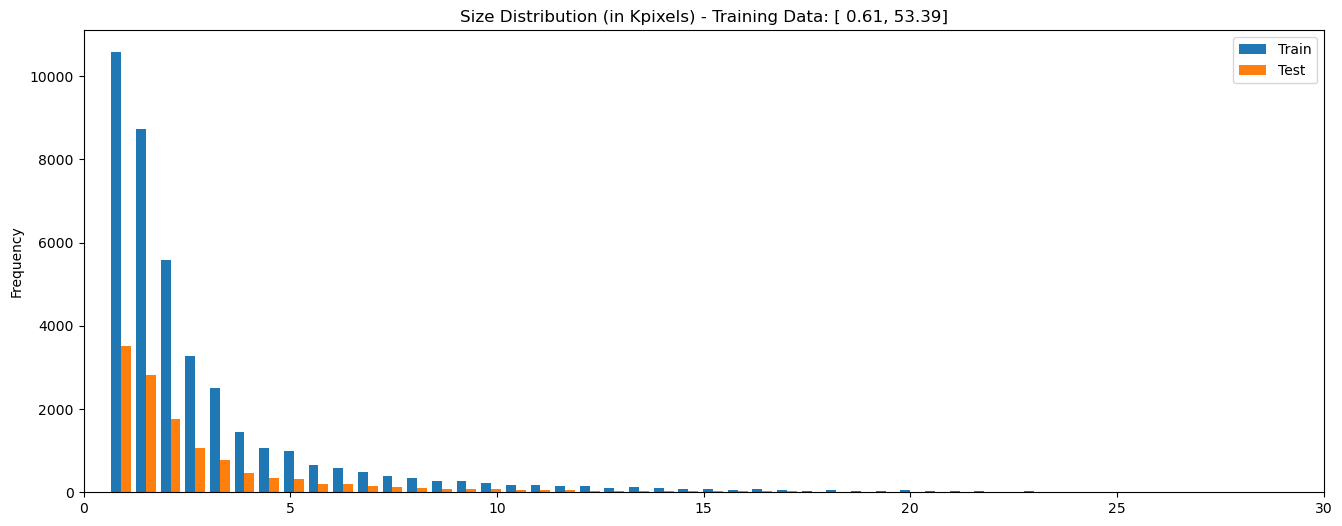

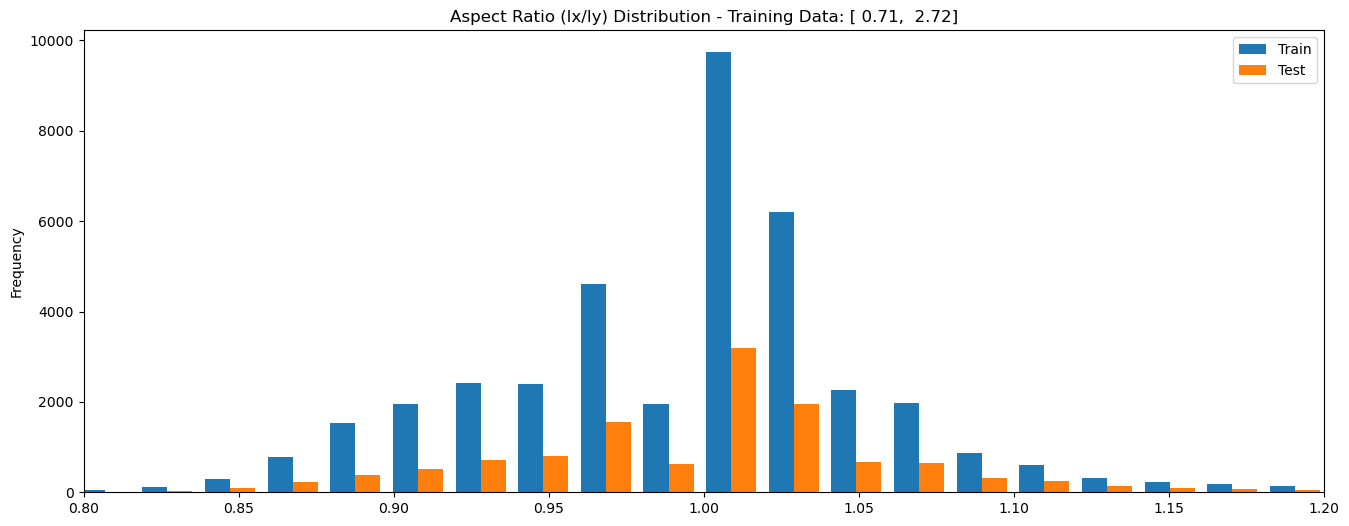

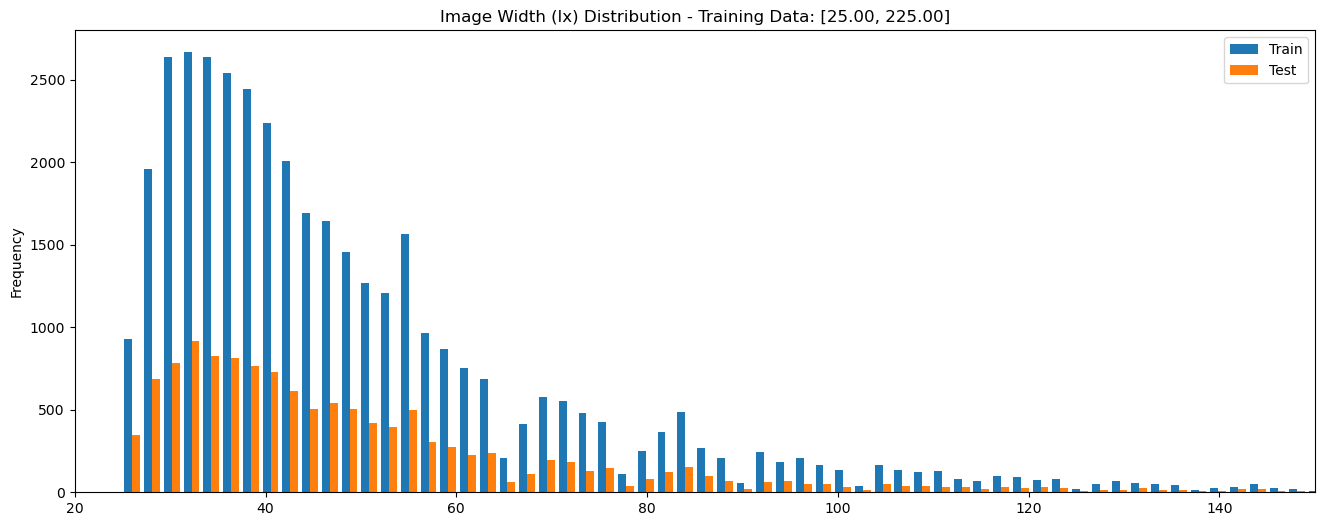

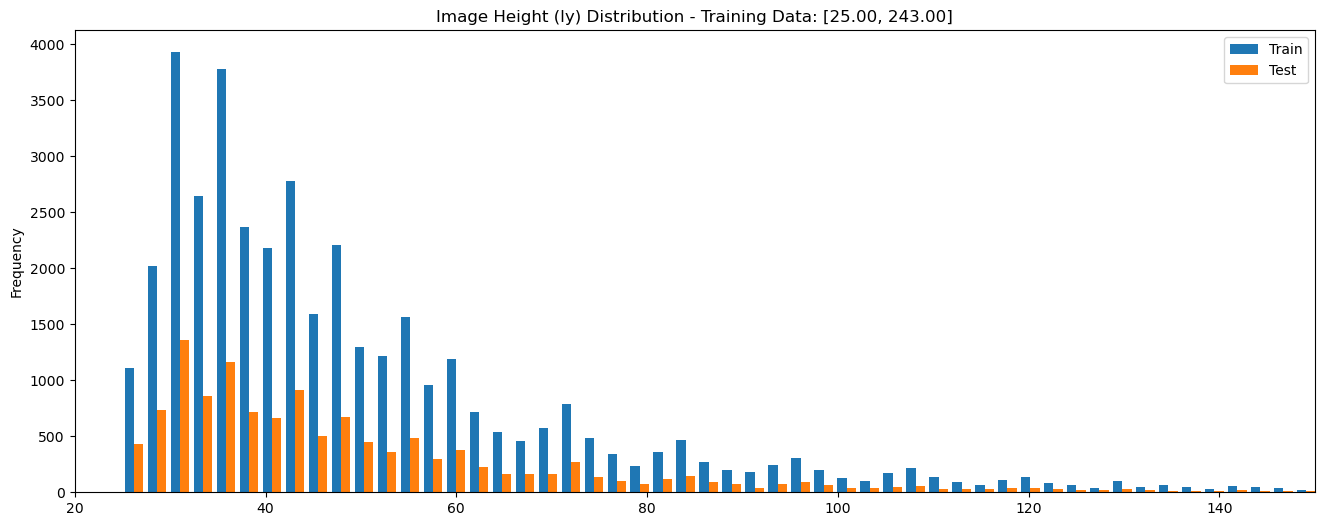

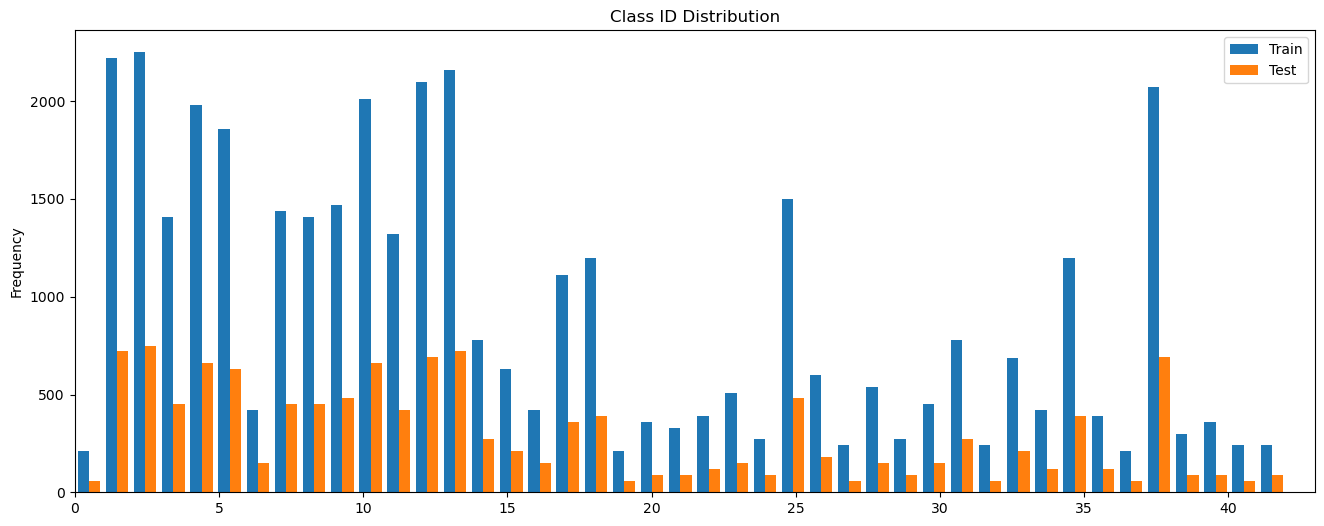

In [8]:
# Size Statistics
# ----
plt.figure(figsize=(16,6))
plt.hist([train_size,test_size], bins=100)
plt.gca().set(title=f'Size Distribution (in Kpixels) - Training Data: [{min(train_size):5.2f}, {max(train_size):5.2f}]', ylabel='Frequency', xlim=[0,30])
plt.legend(['Train','Test'])
plt.show()

# Aspect Ratio Statistics (lx/ly)
# ----
plt.figure(figsize=(16,6))
plt.hist([train_ratio,test_ratio], bins=100)
plt.gca().set(title=f'Aspect Ratio (lx/ly) Distribution - Training Data: [{min(train_ratio):5.2f}, {max(train_ratio):5.2f}]', ylabel='Frequency', xlim=[0.8,1.2])
plt.legend(['Train','Test'])
plt.show()

# Width (lx) Statistics
# ----
plt.figure(figsize=(16,6))
plt.hist([train_lx,test_lx], bins=100)
plt.gca().set(title=f'Image Width (lx) Distribution - Training Data: [{min(train_lx):5.2f}, {max(train_lx):5.2f}]', ylabel='Frequency', xlim=[20,150])
plt.legend(['Train','Test'])
plt.show()

# Height (ly) Statistics
# ----
plt.figure(figsize=(16,6))
plt.hist([train_ly,test_ly], bins=100)
plt.gca().set(title=f'Image Height (ly) Distribution - Training Data: [{min(train_ly):5.2f}, {max(train_ly):5.2f}]', ylabel='Frequency', xlim=[20,150])
plt.legend(['Train','Test'])
plt.show()

# Class ID Distribution
# ----
plt.figure(figsize=(16,6))
plt.hist([y_train,y_test], bins=43)
plt.gca().set(title='Class ID Distribution', ylabel='Frequency', xlim=[0,43])
plt.legend(['Train','Test'])
plt.show()


## 5. Exploring the Image Classes

In this section, we will delve into understanding the 43 distinct classes that our images fall into. These classes represent different types of traffic signs, and each class is denoted by a unique class ID. Gaining a clear understanding of these categories will assist us in later stages of model training and prediction.

### 5.1. Exploring the Meta Image Classes

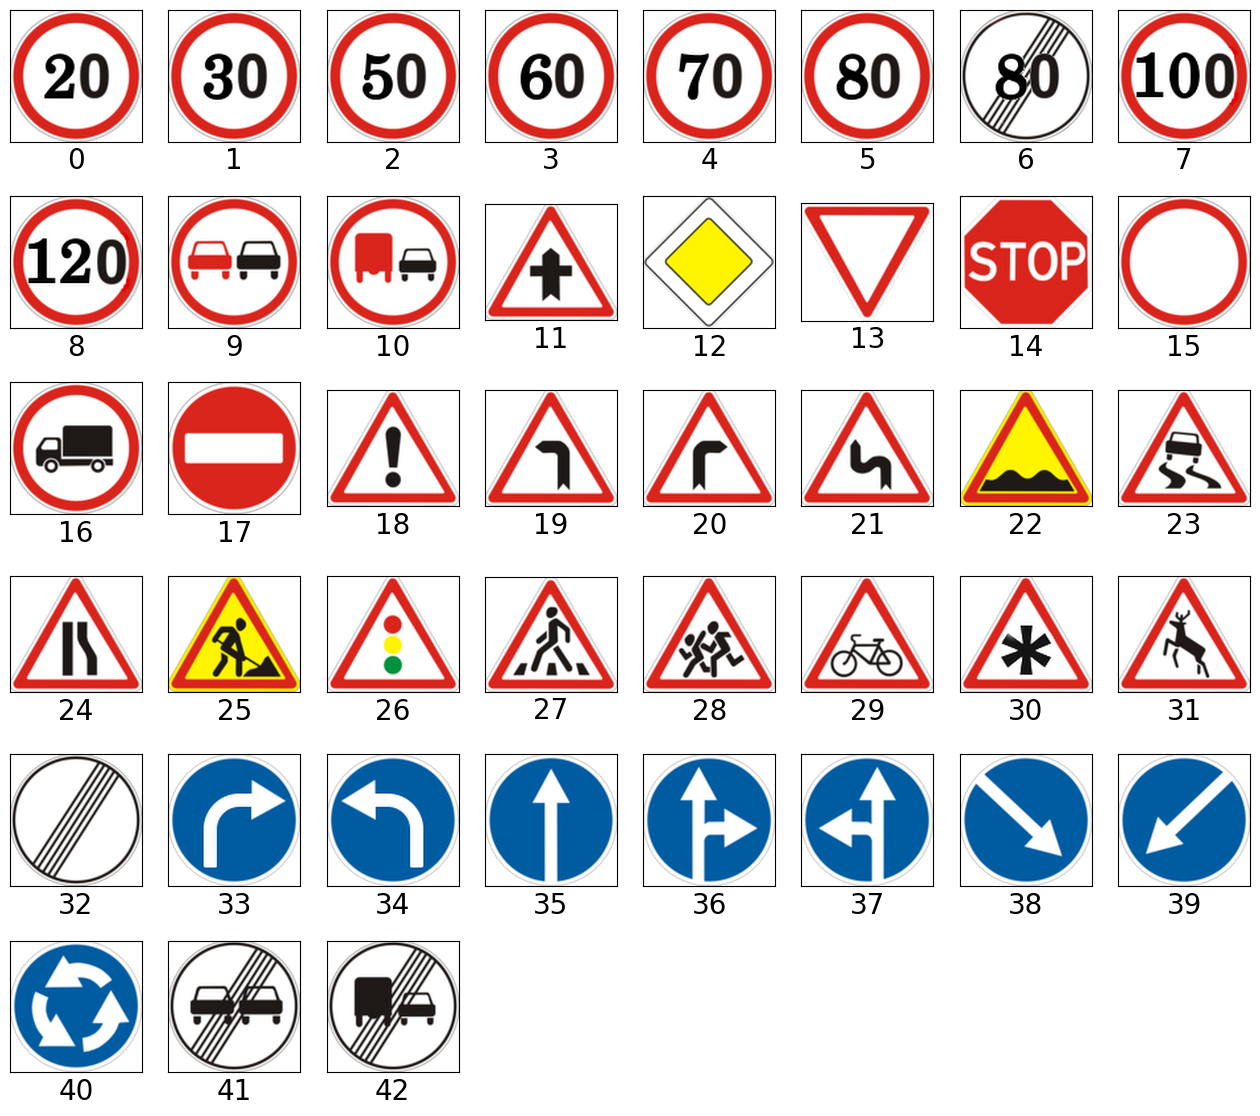

In [9]:
show_images(
    x_meta,
    y_meta, 
    range(43), 
    columns=8, 
    figure_size=(2,2), 
    show_colorbar=False, 
    y_pred=None, 
    color_map='binary'
)

### 5.2. Exploring the Data Image Classes

In this step, we aim to gain a visual understanding of our dataset. By inspecting the actual images from each class, we can have a more tangible grasp of what the traffic signs in our dataset look like, enhancing our understanding of the data we are working with.

**Data**

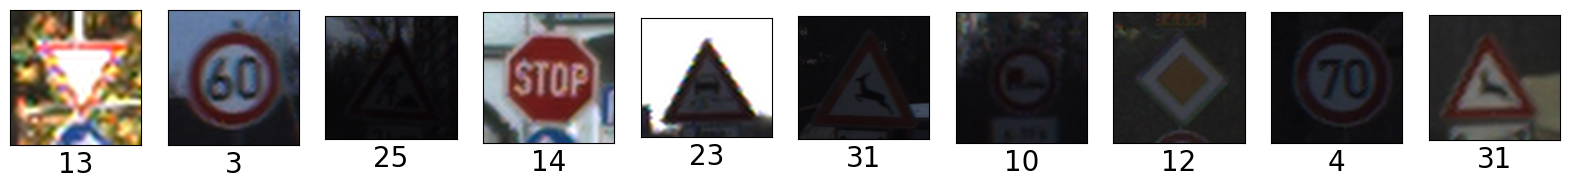

**Meta**

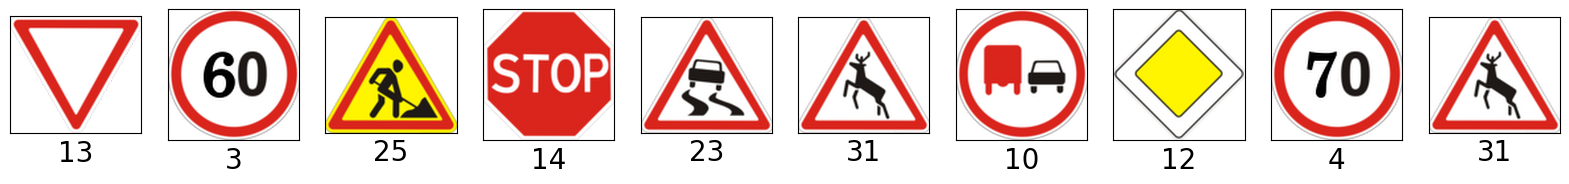

**Data**

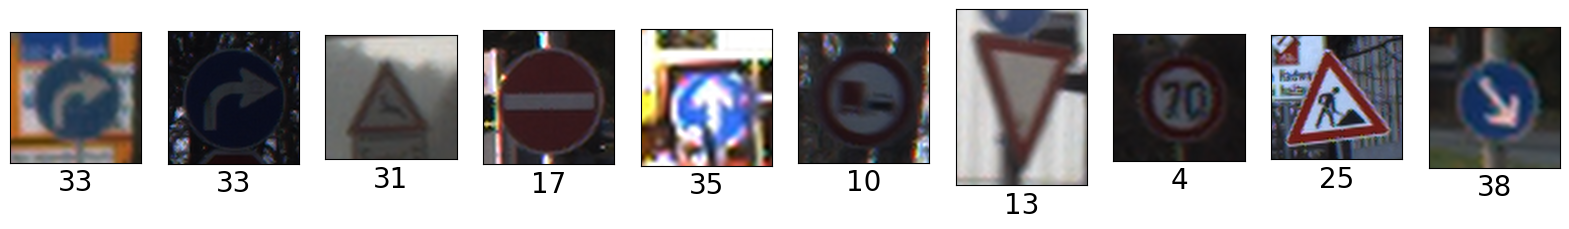

**Meta**

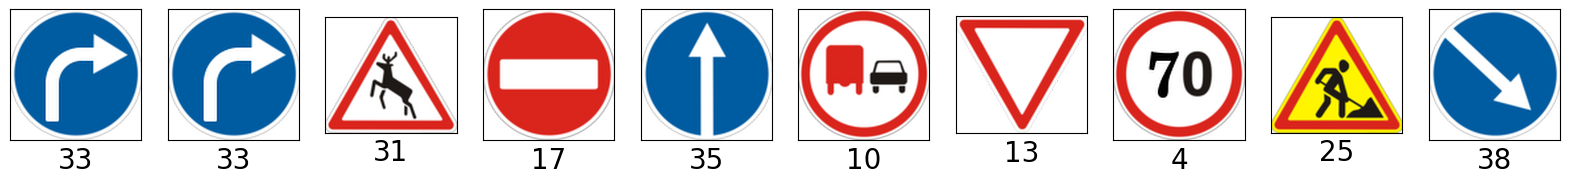

In [10]:
samples = [random.randint(0,len(x_train)-1) for i in range(10)]    
show_data_and_sample_images(samples)

samples = [random.randint(0,len(x_train)-1) for i in range(10)]    
show_data_and_sample_images(samples)

## 6. Preprocessing the Dataset

For successful training of our model, the images in our dataset need to satisfy certain criteria. These include:

- **Uniform Size**: The images must all have the same dimensions to match the input requirements of the neural network model.
- **Normalization**: The pixel values of the images should be normalized to fall within a specific range, typically between 0 and 1. This aids in speeding up the training process and achieving better performance.

We choose to work with either **RGB** (colored)

### 6.1. Enhancing Images Through Preprocessing

In this section, we will implement various preprocessing steps to enhance our images before the training process. These steps include normalization, resizing.

This will allow us to visualize the effects of image enhancement techniques on these samples.

IntProgress(value=0, bar_style='info', max=16)

**EXPECTED**

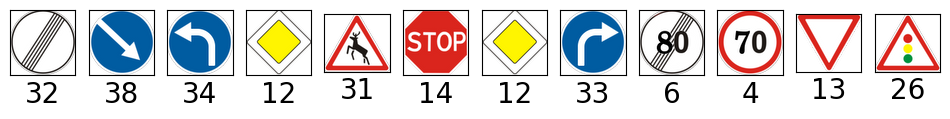

**ORIGINAL**

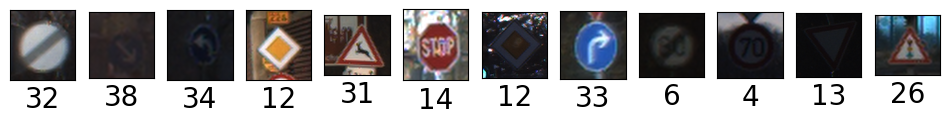

**ENHANCED**

Dataset: RGB  min,max=[0.030,1.000]  shape=(16, 25, 25, 3)


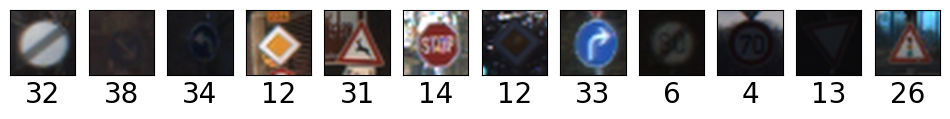

In [11]:
# Randomly select 16 samples
i = random.randint(0, len(x_train) - 16)
x_samples = x_train[i:i+16]
y_samples = y_train[i:i+16]

# Apply image enhancement for different modes
datasets = preprocess_images(x_samples, width=25, height=25)

# Display expected images
show_text("b", 'EXPECTED')
x_expected = [x_meta[i] for i in y_samples]
show_images(
    x_expected, 
    y_samples, 
    range(12), 
    columns=12, 
    figure_size=(1, 1),
    show_colorbar=False, 
    y_pred=None, 
    color_map='binary'
)

# Display original images
show_text("b", 'ORIGINAL')
show_images(
    x_samples, 
    y_samples, 
    range(12), 
    columns=12, 
    figure_size=(1, 1),
    show_colorbar=False, 
    y_pred=None, 
    color_map='binary'
)

# Display enhanced images for each dataset
show_text("b", 'ENHANCED')
print("Dataset: RGB  min,max=[{:.3f},{:.3f}]  shape={}".format(datasets.min(), datasets.max(), datasets.shape))
show_images(
    datasets, 
    y_samples, 
    range(12), 
    columns=12, 
    figure_size=(1, 1),
    show_colorbar=False, 
    y_pred=None, 
    color_map='binary'
)


### 6.2. Generate enhanced Datasets
In this section, we will generate enhanced datasets by applying feature engineering techniques to the existing data.

Comment: Feature engineering is an important step in any machine learning project as it helps in creating new features or transforming existing ones to improve the performance of the models.


In [12]:
n_train = int(len(x_train)*scale )
n_test  = int(len(x_test)*scale )

show_text("b",'Parameters :')
print(f'Scale is : {scale}')
print(f'x_train length is : {n_train}')
print(f'x_test  length is : {n_test}')
print(f'output dir is     : {data_output_dir}\n')

mkdir(data_output_dir)

datasets = []
for s in datasets_size:
    filename = f'{data_output_dir}/set-{s}x{s}-RGB.h5'
    datasets.append(f"set-{s}x{s}-RGB")
    show_text("b",f'Dataset : {filename}')
    
    # Preprocess
    # ----
    x_train_new = preprocess_images( x_train[:n_train], width=s, height=s)
    x_test_new  = preprocess_images( x_test[:n_test],  width=s, height=s)
    x_meta_new  = preprocess_images( x_meta,  width=s, height=s)
        
    # Save
    # ---- 
    save_h5_dataset(x_train_new, y_train[:n_train], x_test_new, y_test[:n_test], x_meta_new,y_meta, filename)
    x_train_new, x_test_new=0,0

**Parameters :**

Scale is : 1
x_train length is : 39209
x_test  length is : 12630
output dir is     : ./data



**Dataset : ./data/set-48x48-RGB.h5**

IntProgress(value=0, bar_style='info', max=39209)

IntProgress(value=0, bar_style='info', max=12630)

IntProgress(value=0, bar_style='info', max=43)

Dataset : ./data/set-48x48-RGB.h5   shape : (39209, 48, 48, 3)     size : 2736.4 Mo   (saved)


### 6.3. Preview of Enhancing Images

**Dataset : ./data/set-48x48-RGB.h5 from h5 file.**

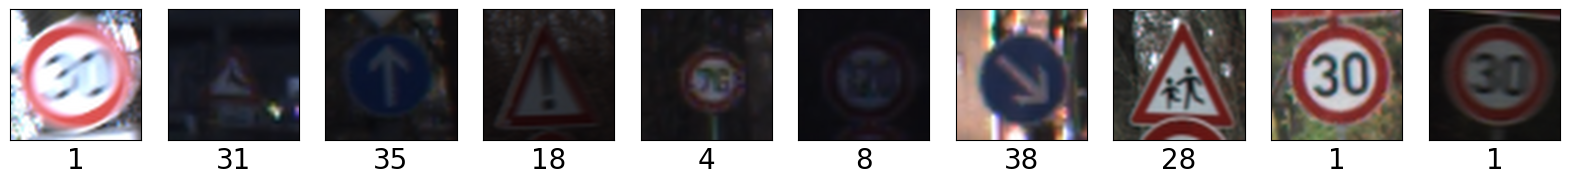

In [13]:
samples=range(10)

for s in datasets_size:
    filename = f'{data_output_dir}/set-{s}x{s}-RGB.h5'
    with  h5py.File(filename,'r') as f:
        x_tmp = f['x_train'][:]
        y_tmp = f['y_train'][:]
        show_text("b",f'Dataset : {filename} from h5 file.')
        show_images(
            x_tmp,
            y_tmp, 
            samples, 
            columns=10, 
            figure_size=(2,2), 
            show_colorbar=False, 
            y_pred=None, 
            color_map='binary'
        )
    x_tmp,y_tmp=0,0

### 7. Create Models

In this context, we have three Convolutional Neural Network (CNN) models built with Keras for image classification. Each of the models is increasingly complex, offering greater modeling capacity but also increased risk of overfitting.

1. `get_model_v1(lx,ly,lz)`: This is the basic model consisting of two sets of Conv2D, MaxPooling2D, and Dropout layers, followed by a Flatten layer to convert the data into a one-dimensional form. Then, there's a Dense layer with relu activation, a Dropout layer to prevent overfitting, and finally a Dense layer with softmax activation for predicting classes.

2. `get_model_v2(lx,ly,lz)`: This model is more sophisticated, with three sets of Conv2D, MaxPooling2D, and Dropout layers, with an increasing number of filters for the Conv2D layers. It also includes a Flatten layer, a Dense layer with relu activation, a Dropout layer, and a Dense layer with softmax activation.

3. `get_model_v3(lx,ly,lz)`: This is the most sophisticated model, with BatchNormalization layers after Conv2D layers to speed up the convergence of learning and stabilize neuron activations. This model also includes MaxPooling2D, Dropout, Flatten, Dense layers and a final Dense layer with softmax activation.

Each model takes in the image dimensions (width `lx`, height `ly`, and color depth `lz`) and returns a compiled neural network model that can be trained on image data.


In [14]:
# A basic model
#
def get_model_v1(lx,ly,lz):
    model = keras.models.Sequential()
    
    model.add( keras.layers.Conv2D(96, (3,3), activation='relu', input_shape=(lx,ly,lz)))
    model.add( keras.layers.MaxPooling2D((2, 2)))
    model.add( keras.layers.Dropout(0.2))

    model.add( keras.layers.Conv2D(192, (3, 3), activation='relu'))
    model.add( keras.layers.MaxPooling2D((2, 2)))
    model.add( keras.layers.Dropout(0.2))

    model.add( keras.layers.Flatten()) 
    model.add( keras.layers.Dense(1500, activation='relu'))
    model.add( keras.layers.Dropout(0.5))

    model.add( keras.layers.Dense(43, activation='softmax'))
    return model
    
# A more sophisticated model
#
def get_model_v2(lx,ly,lz):
    model = keras.models.Sequential()

    model.add( keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(lx,ly,lz), activation='relu'))
    model.add( keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add( keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add( keras.layers.Dropout(0.2))

    model.add( keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add( keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add( keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add( keras.layers.Dropout(0.2))

    model.add( keras.layers.Conv2D(256, (3, 3), padding='same',activation='relu'))
    model.add( keras.layers.Conv2D(256, (3, 3), activation='relu'))
    model.add( keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add( keras.layers.Dropout(0.2))

    model.add( keras.layers.Flatten())
    model.add( keras.layers.Dense(512, activation='relu'))
    model.add( keras.layers.Dropout(0.5))
    
    model.add( keras.layers.Dense(43, activation='softmax'))
    return model

# another more sophisticated model
#
def get_model_v3(lx,ly,lz):
    model = keras.models.Sequential()
    
    model.add(tf.keras.layers.Conv2D(32, (5, 5), padding='same',  activation='relu', input_shape=(lx,ly,lz)))
    model.add(tf.keras.layers.BatchNormalization(axis=-1))      
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same',  activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(axis=-1))
    model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(axis=-1))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.2))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dropout(0.4))

    model.add(tf.keras.layers.Dense(43, activation='softmax'))
    return model

### 8. Train Models & Evaluation

In [15]:
def run_best_dataset_model(
    enhanced_dir, 
    datasets, 
    models, 
    datagen = None,
    scale = 1, 
    batch_size = 64, 
    epochs = 16, 
    verbosity = 0, 
    tag_id = 'last'
):
    """
    This function trains and evaluates a list of models on a list of datasets, saves the best models, and returns the best model and dataset combination based on achieved accuracy.
    
    Args:
        enhanced_dir (str): Directory path containing the datasets.
        datasets (list): List of dataset names (without .h5 extension).
        models (dict): Dictionary of models to be evaluated, formatted as follows: {"model_name": model_generating_function, ...}.
        datagen (tf.keras.preprocessing.image.ImageDataGenerator, optional): Data generator for data augmentation. Defaults to None.
        scale (float, optional): Proportion of the dataset to use for training. Defaults to 1 (all data).
        batch_size (int, optional): Batch size for training. Defaults to 64.
        epochs (int, optional): Number of epochs to train for. Defaults to 16.
        verbosity (int, optional): Verbosity level for the training process. Defaults to 0 (silent).
        tag_id (str, optional): Postfix for report, logs and model directories. Defaults to 'last'.

    Returns:
        tuple: The best dataset and model combination along with the corresponding train and test data.
    """
    # Logs and models dir
    # ---- 
    os.makedirs(f'{run_dir}/logs_{tag_id}', mode=0o750, exist_ok=True)
    os.makedirs(f'{run_dir}/models_{tag_id}', mode=0o750, exist_ok=True)
    
    # Columns of output
    # ---- 
    output = {}
    output['Dataset'] = []
    output['Size'] = []
    for m in models:
        output[m+'_Accuracy'] = []
        output[m+'_Duration'] = []
        
    # Storing Best Dataset & Model
    # ----
    best_accuracy = 0
    best_dataset_model = None
    
    # Each Datasets
    # ----
    for d_name in datasets:
        show_text("h4", f"Dataset : {d_name}")
        
        # Read dataset
        # ----
        x_train,y_train,x_test,y_test, d_size = read_dataset(enhanced_dir, d_name)
        output['Dataset'].append(d_name)
        output['Size'].append(d_size)
        
        # Rescale
        # ----
        x_train,y_train,x_test,y_test = rescale_dataset(x_train,y_train,x_test,y_test, scale=scale)
        
        # Get the shape
        # ----
        (n,lx,ly,lz) = x_train.shape

        # Each model
        # ----
        for m_name,m_function in models.items():
            show_text("h5","    Run model {}".format(m_name))
            print("\n")
            
            # Try model
            # ----
            try:
                # Get function by name
                # ----
                m_function=globals()[m_function]
                model=m_function(lx,ly,lz)
                
                # Show it
                # ----
                display(visualkeras.layered_view(model, legend=True, scale_z=1, scale_xy =20, spacing=80))
                
                # Compile it
                # ----
                model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                
                # Callbacks tensorboard
                # ----
                log_dir = f'{run_dir}/logs_{tag_id}/tb_{d_name}_{m_name}'
                tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
                
                # Callbacks bestmodel
                # ----
                save_dir = f'{run_dir}/models_{tag_id}/model_{d_name}_{m_name}.h5'
                print("\n")
                show_text("h5","    Best model at path {}".format(save_dir))
                print("\n")
                bestmodel_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_dir, verbose=0, monitor='accuracy', save_best_only=True)
                
                # Train
                # ----
                start_time = time.time()
                
                # Data augmentation
                # ----
                if datagen==None:
                    history = model.fit(x_train, y_train,
                                        batch_size      = batch_size,
                                        epochs          = epochs,
                                        verbose         = verbosity,
                                        validation_data = (x_test, y_test),
                                        callbacks       = [tensorboard_callback, bestmodel_callback])
                else:
                    datagen.fit(x_train)
                    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                                        steps_per_epoch = int(len(x_train)/batch_size),
                                        epochs          = epochs,
                                        verbose         = verbosity,
                                        validation_data = (x_test, y_test),
                                        callbacks       = [tensorboard_callback, bestmodel_callback])
                    
                # Result
                # ----
                end_time = time.time()
                duration = end_time-start_time
                accuracy = max(history.history["val_accuracy"])*100
                output[m_name+'_Accuracy'].append(accuracy)
                output[m_name+'_Duration'].append(duration)
                print("\n")
                show_text("b", f"Accuracy={accuracy: 7.2f}    Duration={duration: 7.2f}")
                print("\n")
                
                # Show history
                # ----
                display(show_history(history))
                print("\n")
                
                # Show Predict
                # ----
                y_sigmoid = model.predict(x_test)
                y_pred    = np.argmax(y_sigmoid, axis=-1)
                cmap = plt.get_cmap('Oranges')
                display(show_confusion_matrix(y_test,y_pred,range(43), figsize=(16, 16),normalize=False))
                print("\n")
                
                # Storing best dataset & model
                # ----
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_dataset_model = x_train, y_train, x_test, y_test, model
                
            except:
                print('An error occured for :',m_name)
                
        # Show report
        # ----       
        report = {}
        report['output'] = output
        report['description'] = f'scale={scale} batch_size={batch_size} epochs={epochs} data_aug={with_datagen}'
        show_dict_report(report)
        
    # Return the best dataset & model
    # ----
    return best_dataset_model

#### Dataset : set-48x48-RGB

#####     Run model v2

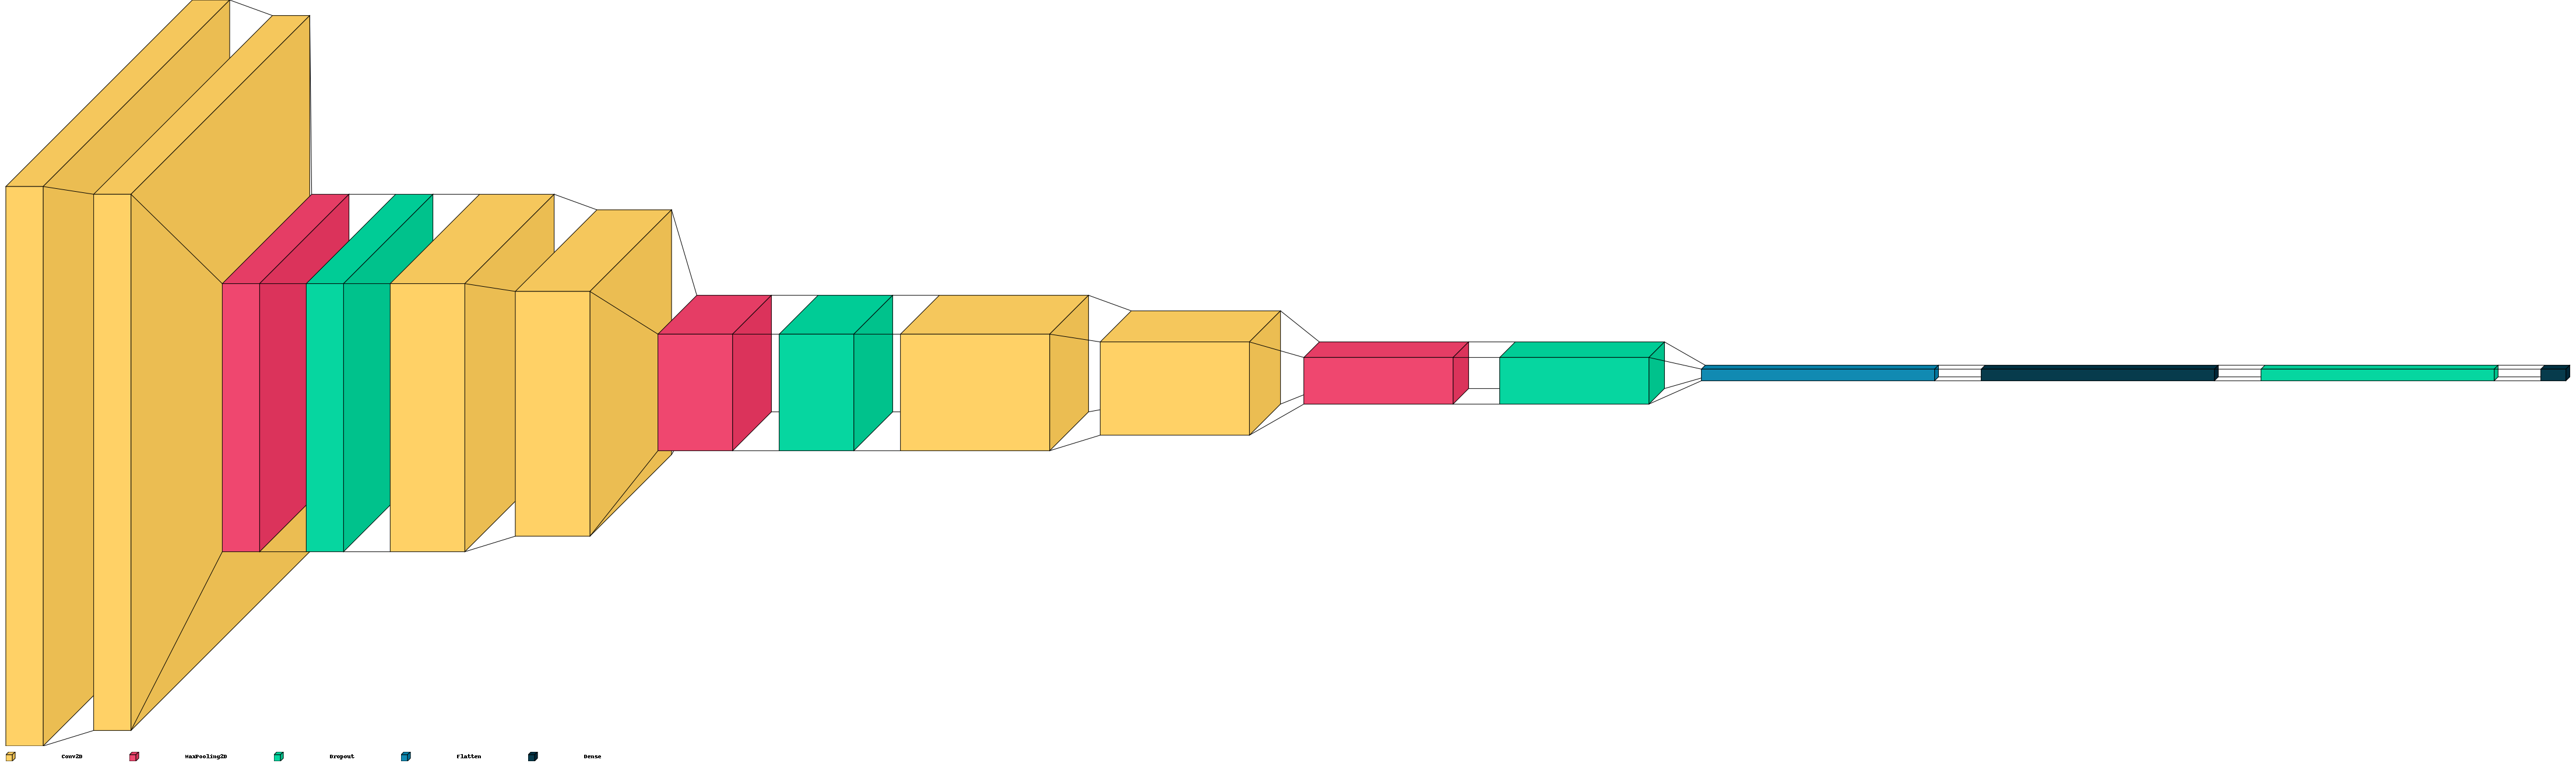

#####     Best model at path ./run/models_68808/model_set-48x48-RGB_v2.h5



Epoch 1/20


In [ ]:
# Data augmentation or not
# ----
if with_datagen :
    datagen = keras.preprocessing.image.ImageDataGenerator(
            featurewise_center = False,
            featurewise_std_normalization = False,
            width_shift_range = 0.1,
            height_shift_range = 0.1,
            zoom_range = 0.2,
            shear_range = 0.1,
            rotation_range = 10.
    )
    
else:
    datagen=None
    
# Run
    # ----
x_train, y_train, x_test, y_test, model = run_best_dataset_model(
                                                data_output_dir,
                                                datasets, 
                                                models,
                                                datagen,
                                                scale,
                                                batch_size,
                                                epochs,
                                                verbosity,
                                                tag_id
                                            )

### 9. Evaluation Previews

In [ ]:
# Predict
# ----
y_probabilities = best_model.predict(x_test)
y_pred = np.argmax(y_probabilities, axis=-1)

# Show All
# ----
show_text("h4",f'Preview All')
show_images(x_test, y_test, range(0,30), columns=10, figure_size = (2,2), y_pred=y_pred)

# Show Error
# ----
show_text("h4",f'Preview Error')
errors = [i for i in range(len(x_test)) if y_pred[i] != y_test[i]]
errors = errors[:min(24,len(errors))]
show_images(x_test, y_test, errors[:20], columns = 10, figure_size = (2,2), y_pred = y_pred)

## References

The creation of this document was greatly influenced by the following key sources of information:

1. [Benchmark](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset) - This is the official site for the GTSRB dataset, providing crucial details about the data structure and its applications.
2. [Fidle](https://gricad-gitlab.univ-grenoble-alpes.fr/talks/fidle/-/wikis/home) - An informative guide that provides in-depth explanations and examples on various data science topics.